# Tualating River WQ Modeling 

### Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest

## A) Set up dataframe, manage data types and placeholders for missing values

In [2]:
# change directory folder
os.chdir('U:/Research_and_Innovation/_ModellingGroupProjects/Tualatin WQ Model-CR/Data/7_LakeOswego/')
os.getcwd() #to get working directory

'U:\\Research_and_Innovation\\_ModellingGroupProjects\\Tualatin WQ Model-CR\\Data\\7_LakeOswego'

In [3]:
# select file
filepath = 'USGS_LakeOswego.csv'

In [4]:
# read file, change header and column names as needed 
df_origin = pd.read_csv(filepath, header = 57, names = ['Timestamp','WaterTemp','DOmgL','DOsat','pH','Cond','AirTemp','Press','Turb','Chla-A','Phyco','BGA'],index_col=False)
df_origin

,Timestamp,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA
0,5/7/1991 1:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
1,5/7/1991 2:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
2,5/7/1991 3:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
3,5/7/1991 4:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
4,5/7/1991 5:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
...,...,...,...,...,...,...,...,...,...,...,...,...
280123,4/20/2023 20:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
280124,4/20/2023 21:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
280125,4/20/2023 22:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25
280126,4/20/2023 23:00,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25,-1.230000e+25


In [5]:
df_origin.dtypes

Timestamp     object
WaterTemp    float64
DOmgL        float64
DOsat        float64
pH           float64
Cond         float64
AirTemp      float64
Press        float64
Turb         float64
Chla-A       float64
Phyco        float64
BGA          float64
dtype: object

In [6]:
#convert timestamp which is a string type to a timestamp object
formatd = "%m/%d/%Y %H:%M"
df_origin.Timestamp = df_origin.Timestamp.apply(lambda date : datetime.datetime.strptime(date, formatd))

In [7]:
# Not always applicable, define for each datataset as needed
# -123456E20 is a placeholder value for missing values
df_origin = df_origin.replace(-1.2299999999999998e+25, math.nan)
df_origin

,Timestamp,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA
0,1991-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-05-07 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-05-07 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-05-07 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
280123,2023-04-20 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280124,2023-04-20 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280125,2023-04-20 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280126,2023-04-20 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_original_info = df_origin.info()
df_original_info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280128 entries, 0 to 280127
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  280128 non-null  datetime64[ns]
 1   WaterTemp  273823 non-null  float64       
 2   DOmgL      270907 non-null  float64       
 3   DOsat      270715 non-null  float64       
 4   pH         272657 non-null  float64       
 5   Cond       269761 non-null  float64       
 6   AirTemp    252175 non-null  float64       
 7   Press      207693 non-null  float64       
 8   Turb       153568 non-null  float64       
 9   Chla-A     101830 non-null  float64       
 10  Phyco      20353 non-null   float64       
 11  BGA        22994 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 25.6 MB


## B) Data Exploration

In [9]:
df_origin.describe()

,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA
count,273823.000000,270907.000000,270715.000000,272657.000000,269761.000000,252175.000000,207693.000000,153568.000000,101830.000000,20353.000000,22994.000000
mean,13.492371,8.643524,81.695558,7.019938,199.358781,11.685134,760.773257,8.833071,8.139210,0.156408,900.349743
std,5.761596,1.818091,15.643182,0.224484,82.392518,6.959770,5.135379,13.060881,9.388761,0.197997,1098.248184
min,0.700000,3.200000,28.000000,6.200000,53.000000,-11.100000,730.000000,-0.500000,0.000000,-0.310000,-387.000000
25%,8.300000,7.100000,72.000000,6.900000,127.000000,6.600000,758.000000,2.700000,2.600000,0.050000,318.000000
50%,12.800000,8.700000,82.000000,7.000000,189.000000,11.000000,761.000000,4.800000,4.500000,0.130000,612.000000
75%,18.700000,10.100000,87.000000,7.100000,265.000000,16.000000,764.000000,9.900000,9.600000,0.260000,1170.000000
max,26.900000,21.900000,247.000000,9.600000,450.000000,43.500000,779.000000,438.000000,107.000000,7.720000,22123.000000


In [10]:
#description for dry season months
df_origin[(df_origin.Timestamp.dt.month > 2) & (df_origin.Timestamp.dt.month < 9) ].describe()

,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA
count,136764.000000,136323.000000,136273.000000,136525.000000,134494.000000,125829.000000,103760.000000,78603.000000,66688.000000,12573.000000,14790.000000
mean,16.445579,8.511110,86.169982,7.072779,211.565839,14.672727,760.451956,5.917460,10.173255,0.126714,1020.329141
std,5.102347,1.823195,18.609133,0.257365,78.514181,6.643901,4.015742,6.365959,10.344824,0.193688,910.075819
min,4.300000,3.300000,37.000000,6.300000,53.000000,-2.700000,738.000000,-0.300000,0.000000,-0.310000,-262.000000
25%,11.700000,7.200000,76.000000,6.900000,142.000000,9.900000,758.000000,2.600000,3.700000,0.030000,398.000000
50%,17.300000,8.500000,84.000000,7.000000,209.000000,14.300000,760.000000,4.100000,6.200000,0.100000,823.500000
75%,21.000000,9.700000,90.000000,7.100000,272.000000,18.700000,763.000000,6.500000,12.600000,0.220000,1366.750000
max,26.900000,21.900000,247.000000,9.600000,434.000000,43.500000,775.000000,202.000000,107.000000,1.590000,7154.000000


array([[<AxesSubplot:title={'center':'WaterTemp'}>,
        <AxesSubplot:title={'center':'DOmgL'}>,
        <AxesSubplot:title={'center':'DOsat'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Cond'}>,
        <AxesSubplot:title={'center':'AirTemp'}>],
       [<AxesSubplot:title={'center':'Press'}>,
        <AxesSubplot:title={'center':'Turb'}>,
        <AxesSubplot:title={'center':'Chla-A'}>],
       [<AxesSubplot:title={'center':'Phyco'}>,
        <AxesSubplot:title={'center':'BGA'}>, <AxesSubplot:>]],
      dtype=object)

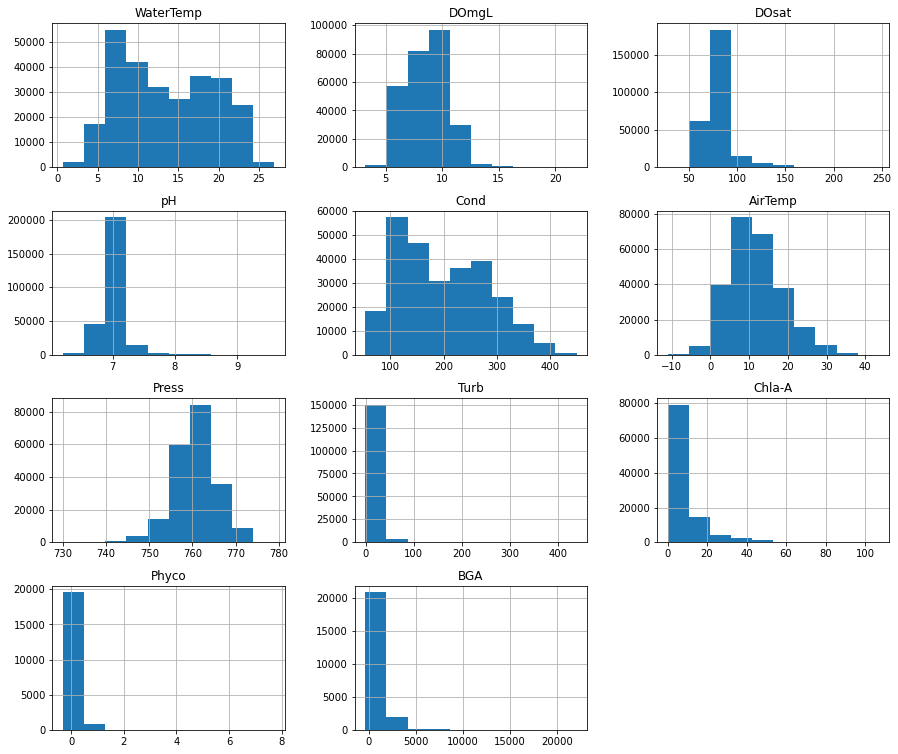

In [11]:
#Create histograms, all data
df_num = df_origin.select_dtypes('number')
df_num.hist(figsize = (15,13))

array([[<AxesSubplot:title={'center':'WaterTemp'}>,
        <AxesSubplot:title={'center':'DOmgL'}>,
        <AxesSubplot:title={'center':'DOsat'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Cond'}>,
        <AxesSubplot:title={'center':'AirTemp'}>],
       [<AxesSubplot:title={'center':'Press'}>,
        <AxesSubplot:title={'center':'Turb'}>,
        <AxesSubplot:title={'center':'Chla-A'}>],
       [<AxesSubplot:title={'center':'Phyco'}>,
        <AxesSubplot:title={'center':'BGA'}>, <AxesSubplot:>]],
      dtype=object)

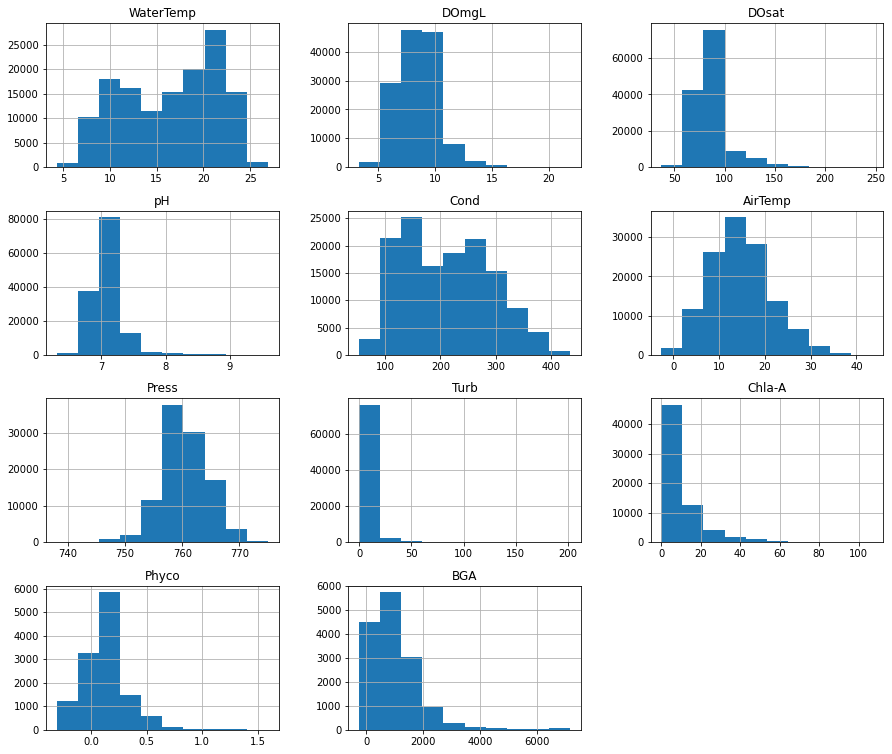

In [12]:
#Create histograms, dry months only
df_num = df_origin[(df_origin.Timestamp.dt.month > 2) & (df_origin.Timestamp.dt.month < 9)].select_dtypes('number')
df_num.hist(figsize = (15,13))

In [13]:
# Create mask column to faciliate data preprocessing
df_origin['DrySeason'] = (df_origin.Timestamp.dt.month > 2) & (df_origin.Timestamp.dt.month < 9)
df_origin

,Timestamp,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA,DrySeason
0,1991-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1991-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,1991-05-07 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,1991-05-07 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,1991-05-07 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280123,2023-04-20 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
280124,2023-04-20 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
280125,2023-04-20 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
280126,2023-04-20 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


#### Conclusion: most of the data does not exhibit a normal distribution. Need to consider this when choosing a ML training algorithm

## C) Detecting outliers at the smaller frequency

In [14]:
df_origin = df_origin.set_index('Timestamp')

### Outlier Detection with Isolation Forest

In [15]:
def detect_outliers_using_isolation_forest(df, features, contamination=0.005):
    """
    Detect outliers using Isolation Forest on a per-column basis.
    
    Parameters:
        - df: DataFrame
        - features: List of feature columns to use
        - contamination: Proportion of outliers in the data set (between 0 and 0.5)
    
    Returns:
        DataFrame with additional columns for each feature indicating if it's an outlier or not (True or False)
    """
    
    # Iterate through each feature
    for feature in features:
        # Remove NaN values for the current feature
        X = df[[feature]].dropna()
        
        # Fit the model on the data with NaN values dropped
        clf = IsolationForest(contamination=contamination)
        preds = clf.fit_predict(X)
        
        # Convert predictions to boolean (True for outliers, False for inliers)
        is_outlier = (preds == -1)
        
        # Create a new column with a suffix '_outlier' for outlier labels
        outlier_col = f"{feature}_outlier"
        
        # Initialize the new column with NaN values
        df[outlier_col] = np.nan
        
        # Populate the new column with the predictions
        df.loc[X.index, outlier_col] = is_outlier
    
    return df

In [16]:
def plot_with_outliers(df, column):
    fig, ax = plt.subplots(figsize=(30, 10))
    
    # Create masks for outliers and non-outliers
    mask_non_outliers = df[f'{column}_outlier'] == False
    mask_outliers = df[f'{column}_outlier'] == True
    
    # Plot non-outliers in blue
    non_outliers = df[mask_non_outliers]
    ax.scatter(non_outliers.index, non_outliers[column], color='blue', label='Non-Outliers')
    
    # Plot outliers in red
    outliers = df[mask_outliers]
    ax.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    
    # Add legend and labels
    ax.legend()
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(column)
    ax.set_title(f'{column} with Outliers Highlighted')
    
    plt.show()

In [42]:
df_out_WaterTemp = detect_outliers_using_isolation_forest(df_origin, ['WaterTemp'], contamination=0.00005)
df_out_DOmgL = detect_outliers_using_isolation_forest(df_out_WaterTemp, ['DOmgL'], contamination=0.0005)
df_out_DOsat = detect_outliers_using_isolation_forest(df_out_DOmgL, ['DOsat'], contamination=0.0005)
df_out_pH = detect_outliers_using_isolation_forest(df_out_DOsat, ['pH'], contamination=0.0005)
df_out_Cond = detect_outliers_using_isolation_forest(df_out_pH, ['Cond'], contamination=0.00025)
df_out_AirTemp = detect_outliers_using_isolation_forest(df_out_Cond, ['AirTemp'], contamination=0.00025)
df_out_Press = detect_outliers_using_isolation_forest(df_out_AirTemp , ['Press'], contamination=0.0005)
df_out_Turb = detect_outliers_using_isolation_forest(df_out_Press , ['Turb'], contamination=0.0005)
df_out_ChlaA = detect_outliers_using_isolation_forest(df_out_Turb , ['Chla-A'], contamination=0.0025)
df_Phyco = detect_outliers_using_isolation_forest(df_out_ChlaA , ['Phyco'], contamination=0.005)
df_outliers = detect_outliers_using_isolation_forest(df_Phyco , ['BGA'], contamination=0.005)

C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\rodriguezc\Anaconda3\lib\site-packages\sklearn\base.py:450: U

In [31]:
df_outliers.columns

Index(['WaterTemp', 'DOmgL', 'DOsat', 'pH', 'Cond', 'AirTemp', 'Press', 'Turb',
       'Chla-A', 'Phyco', 'BGA', 'DrySeason', 'WaterTemp_outlier',
       'DOmgL_outlier', 'DOsat_outlier', 'pH_outlier', 'Cond_outlier',
       'AirTemp_outlier', 'Press_outlier', 'Turb_outlier', 'Chla-A_outlier',
       'Phyco_outlier', 'BGA_outlier'],
      dtype='object')

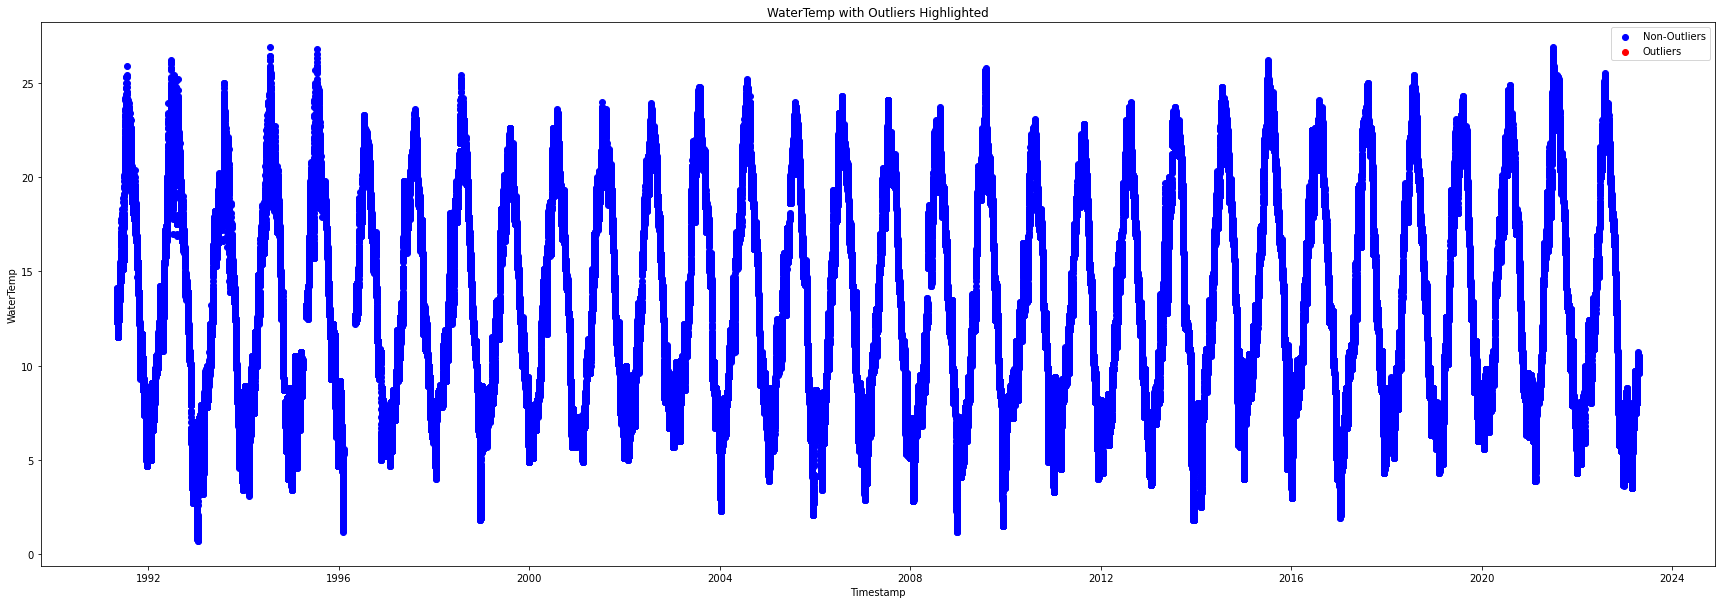

In [32]:
plot_with_outliers(df_outliers, "WaterTemp")

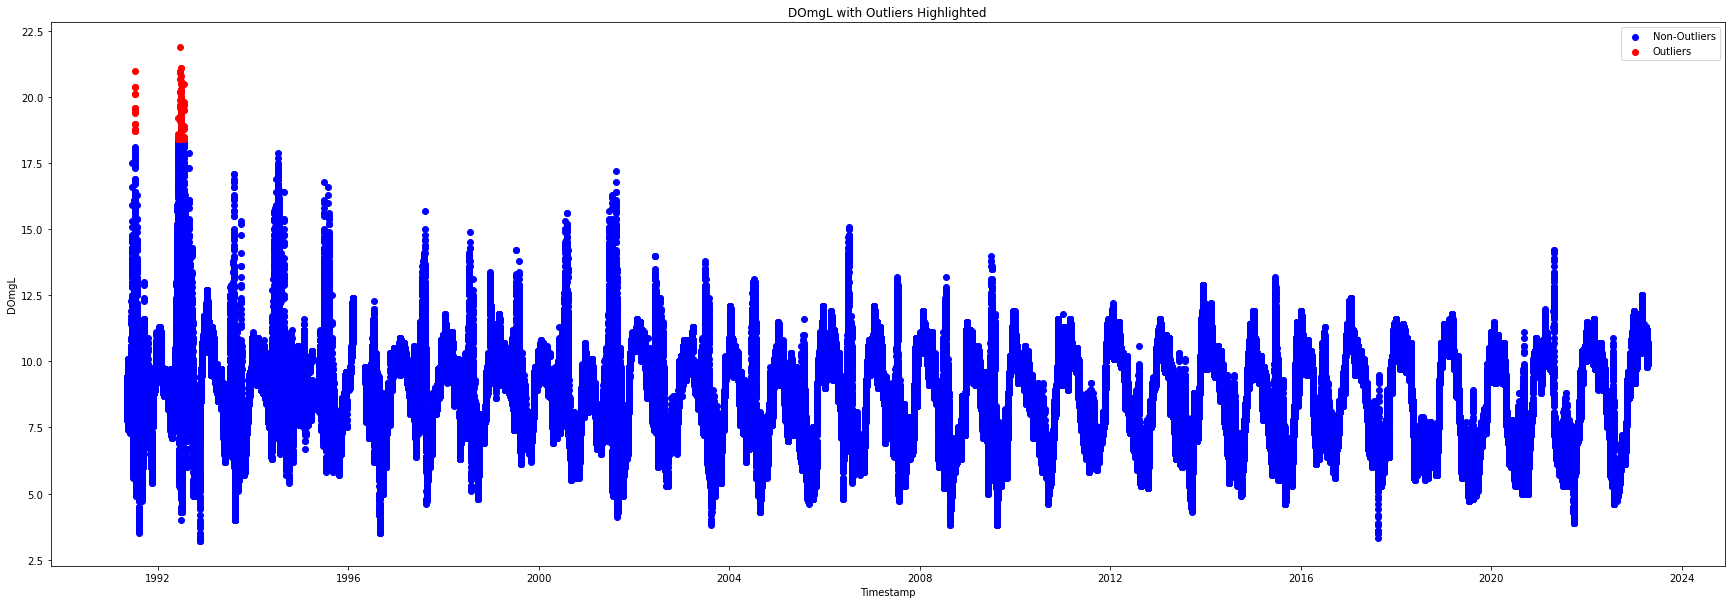

In [33]:
plot_with_outliers(df_origin, "DOmgL")

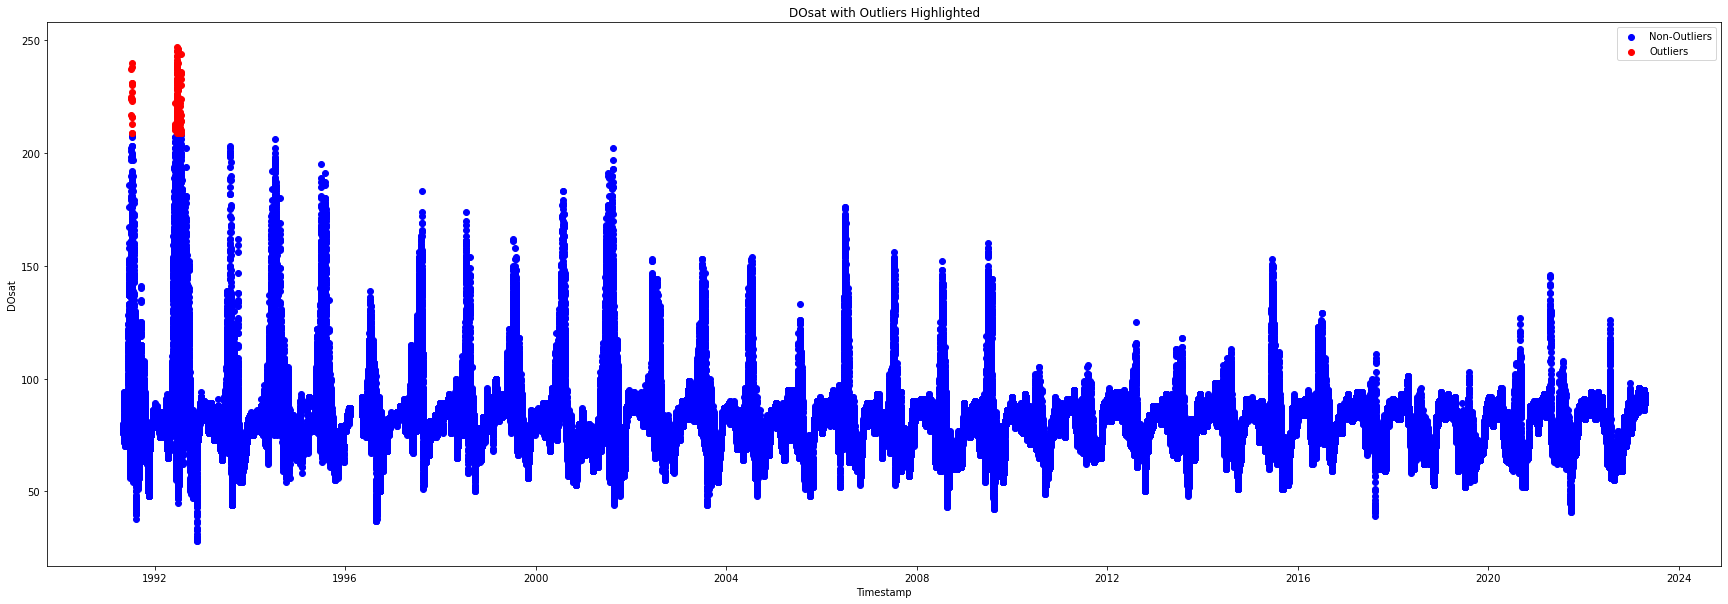

In [34]:
plot_with_outliers(df_origin, "DOsat")

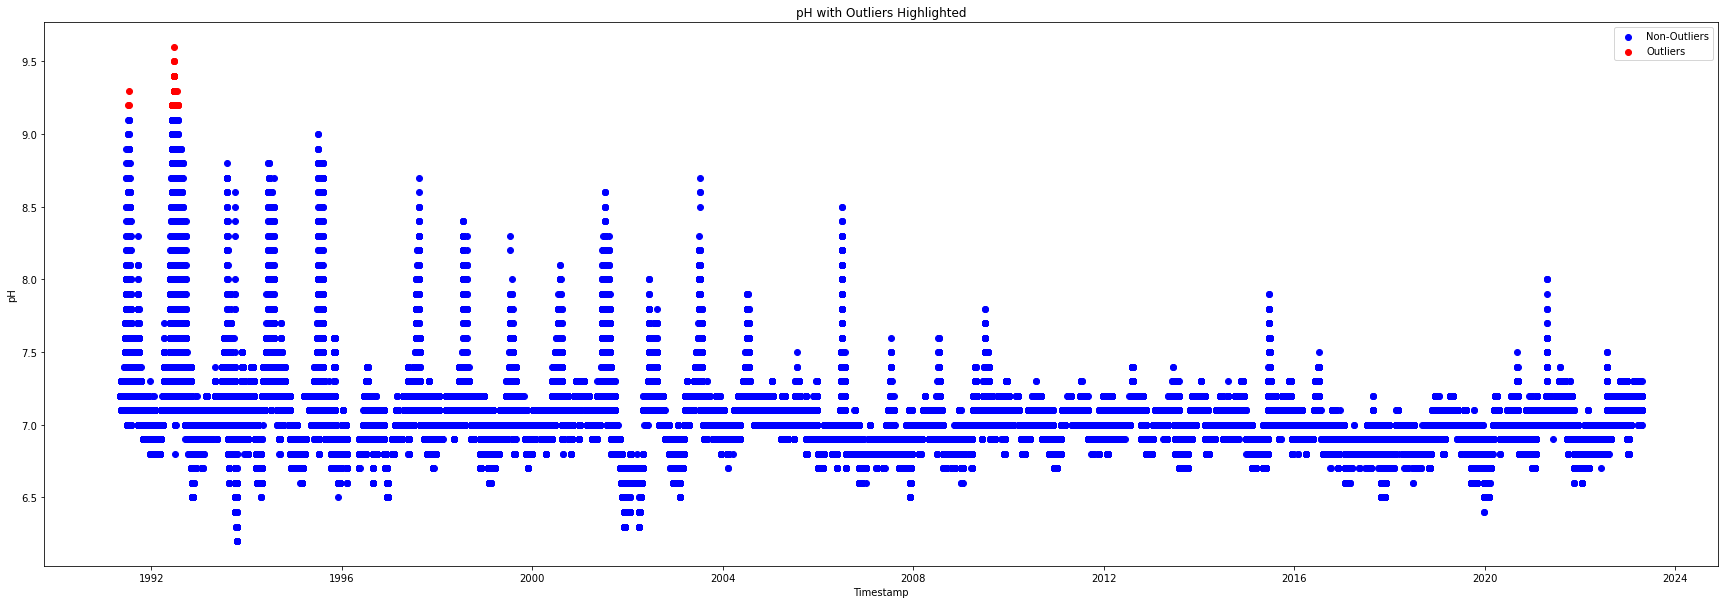

In [35]:
plot_with_outliers(df_outliers, "pH")

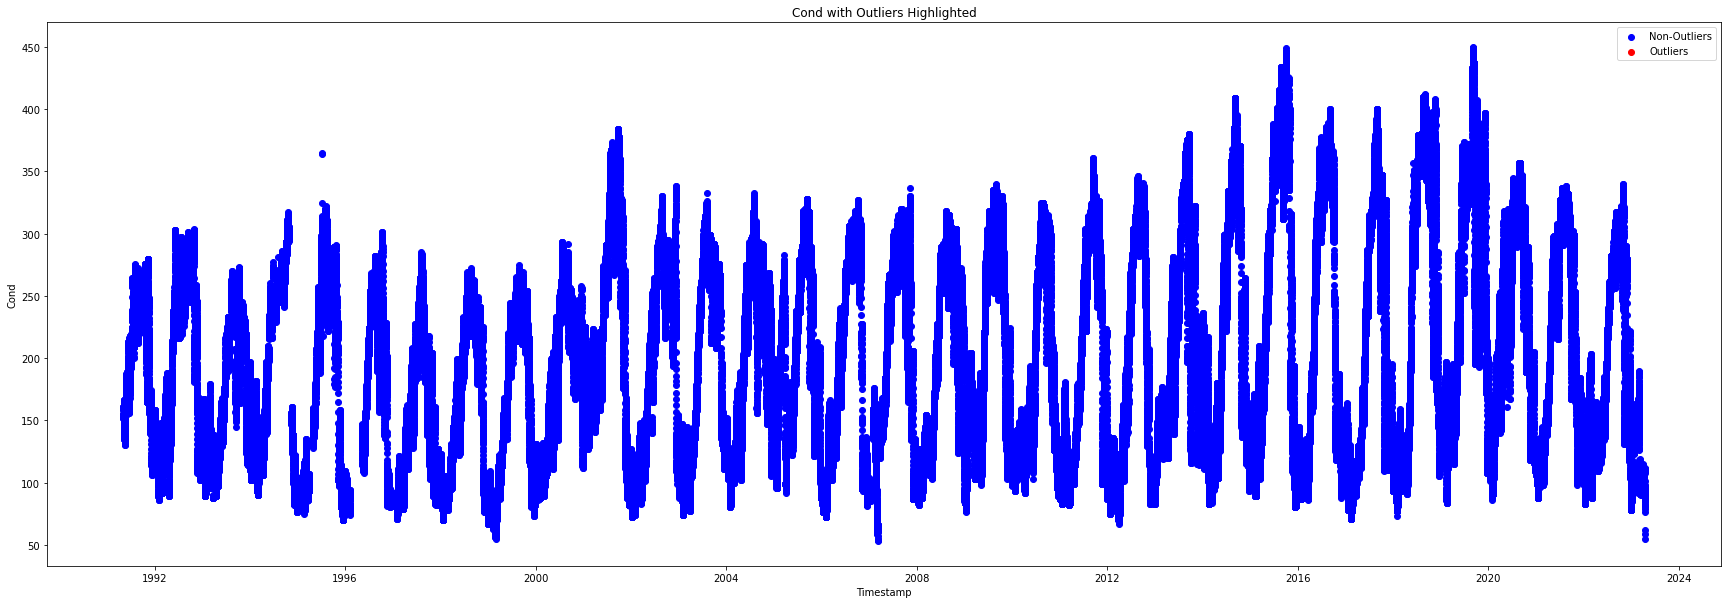

In [36]:
plot_with_outliers(df_outliers, "Cond")

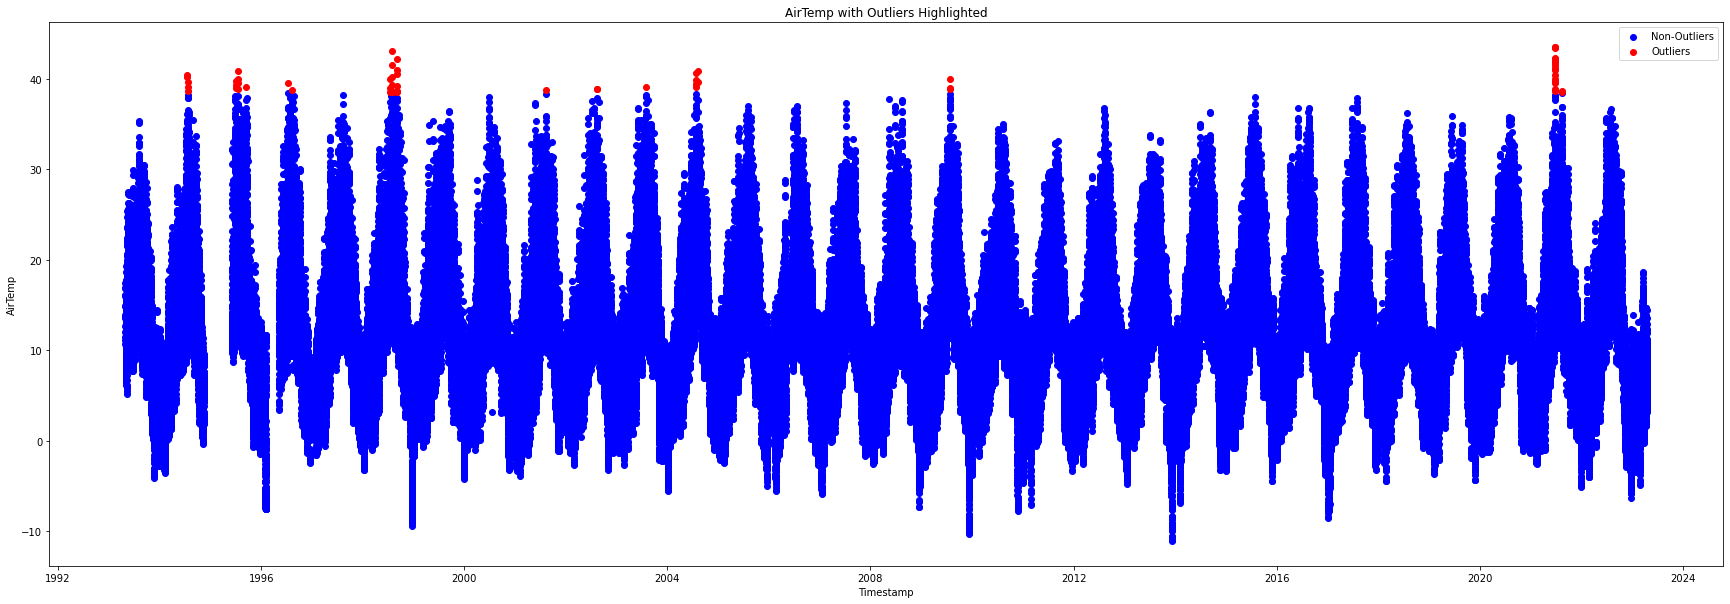

In [37]:
plot_with_outliers(df_outliers, "AirTemp")

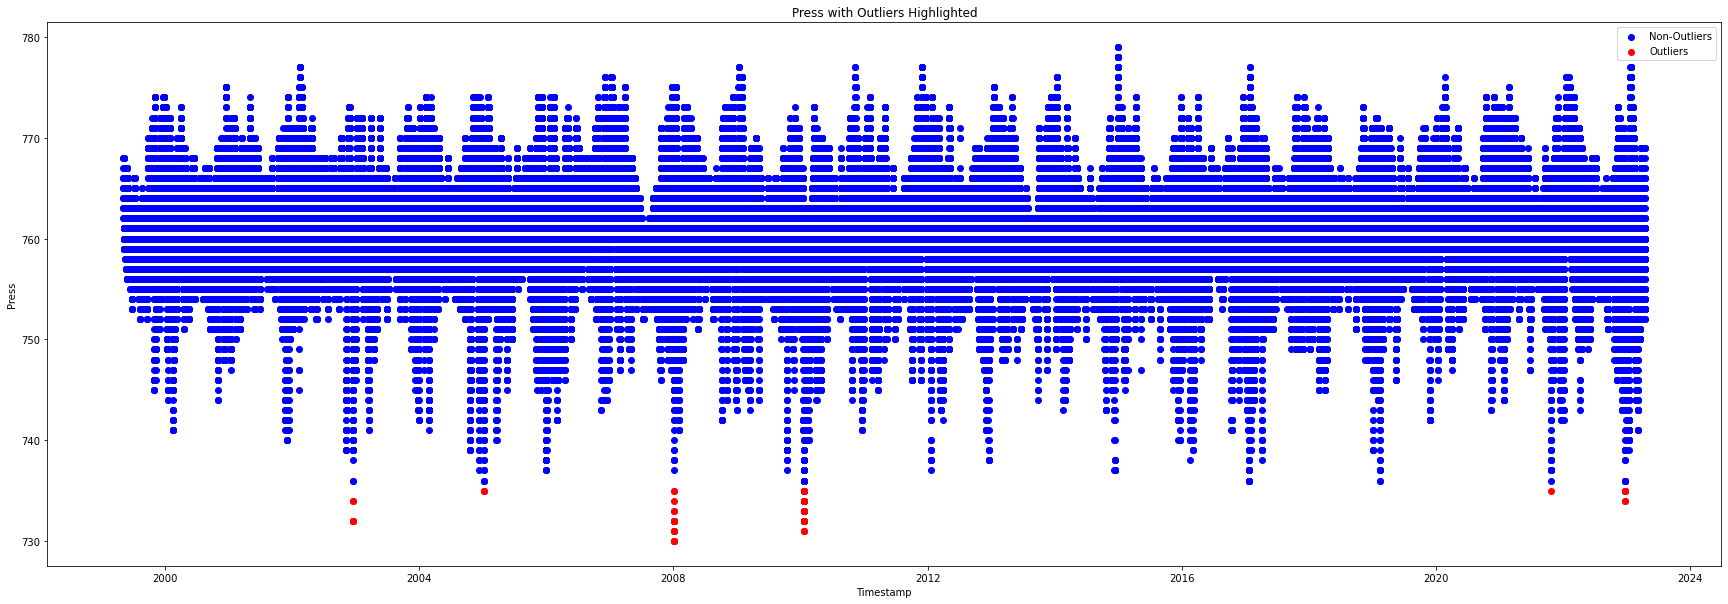

In [43]:
plot_with_outliers(df_outliers, "Press")

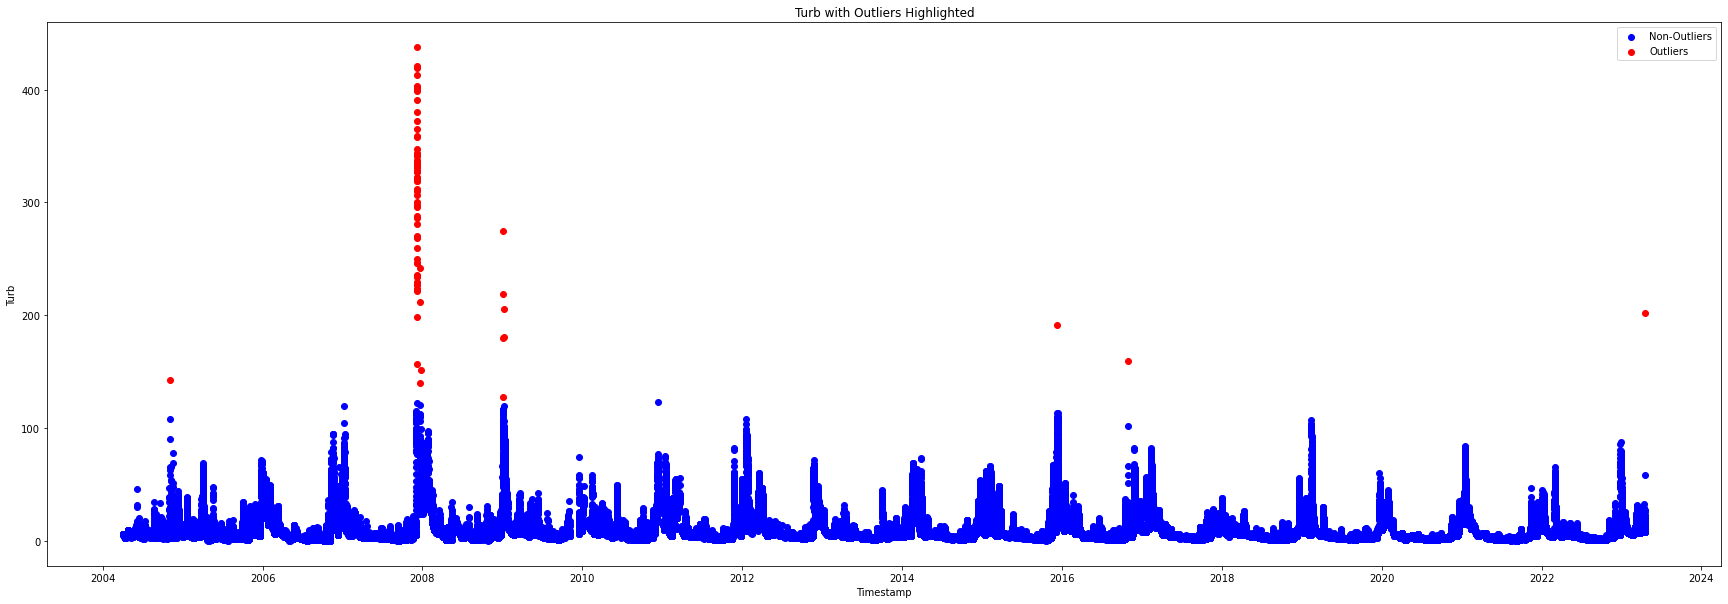

In [44]:
plot_with_outliers(df_outliers, "Turb")

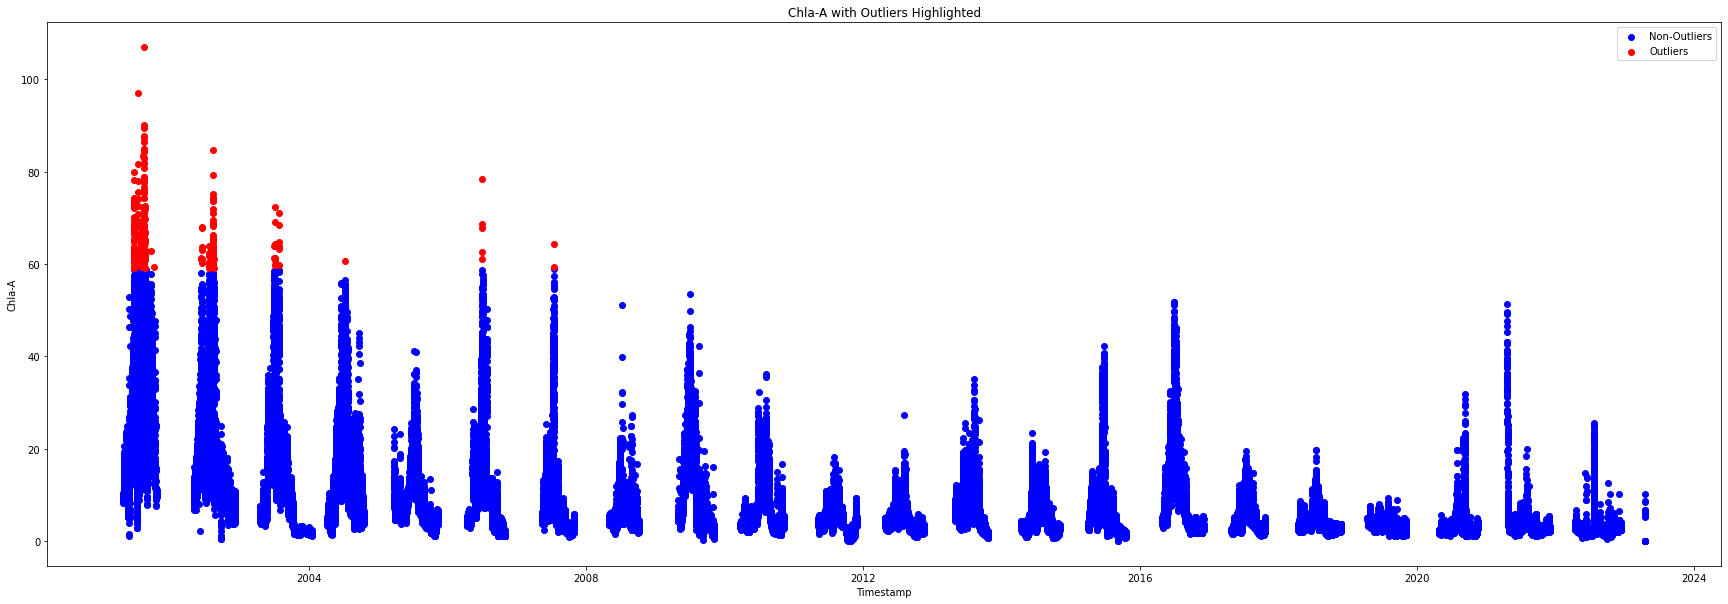

In [45]:
plot_with_outliers(df_outliers, "Chla-A")

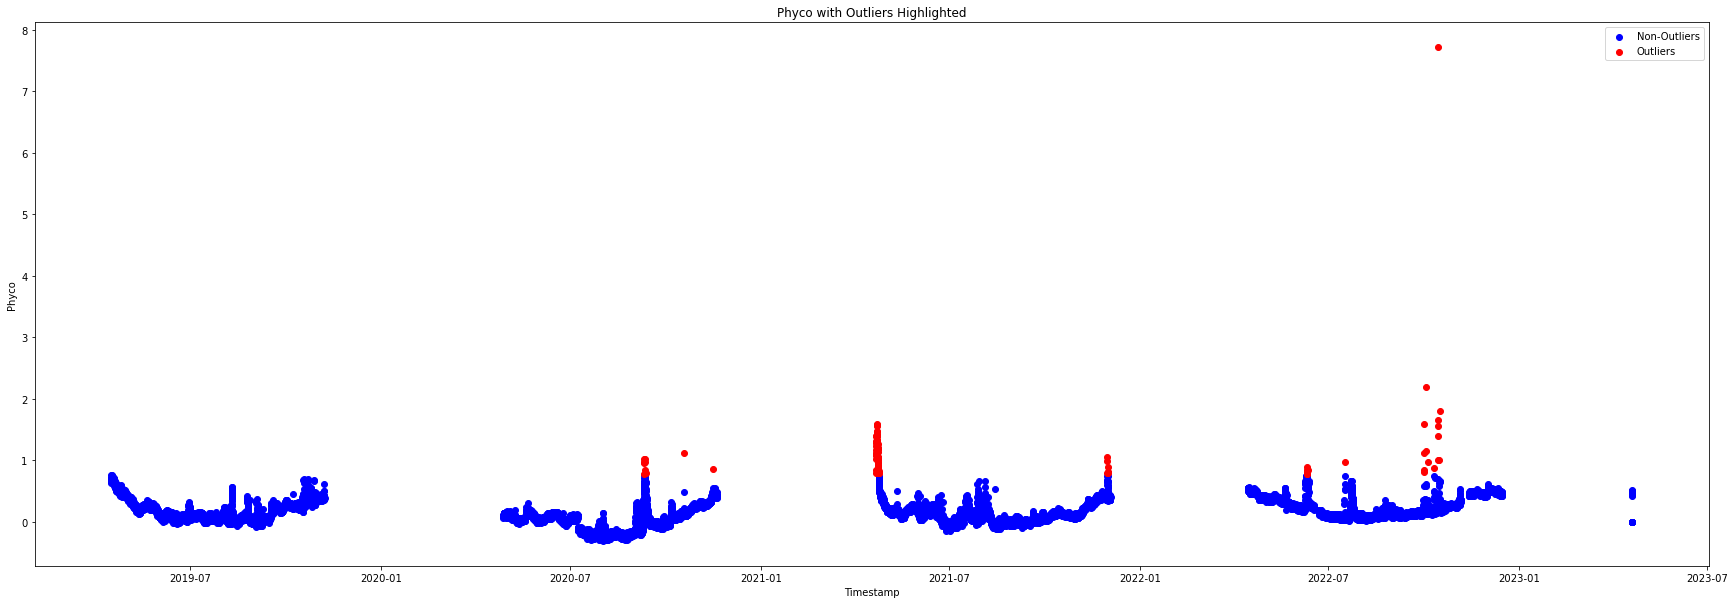

In [46]:
plot_with_outliers(df_outliers, "Phyco")

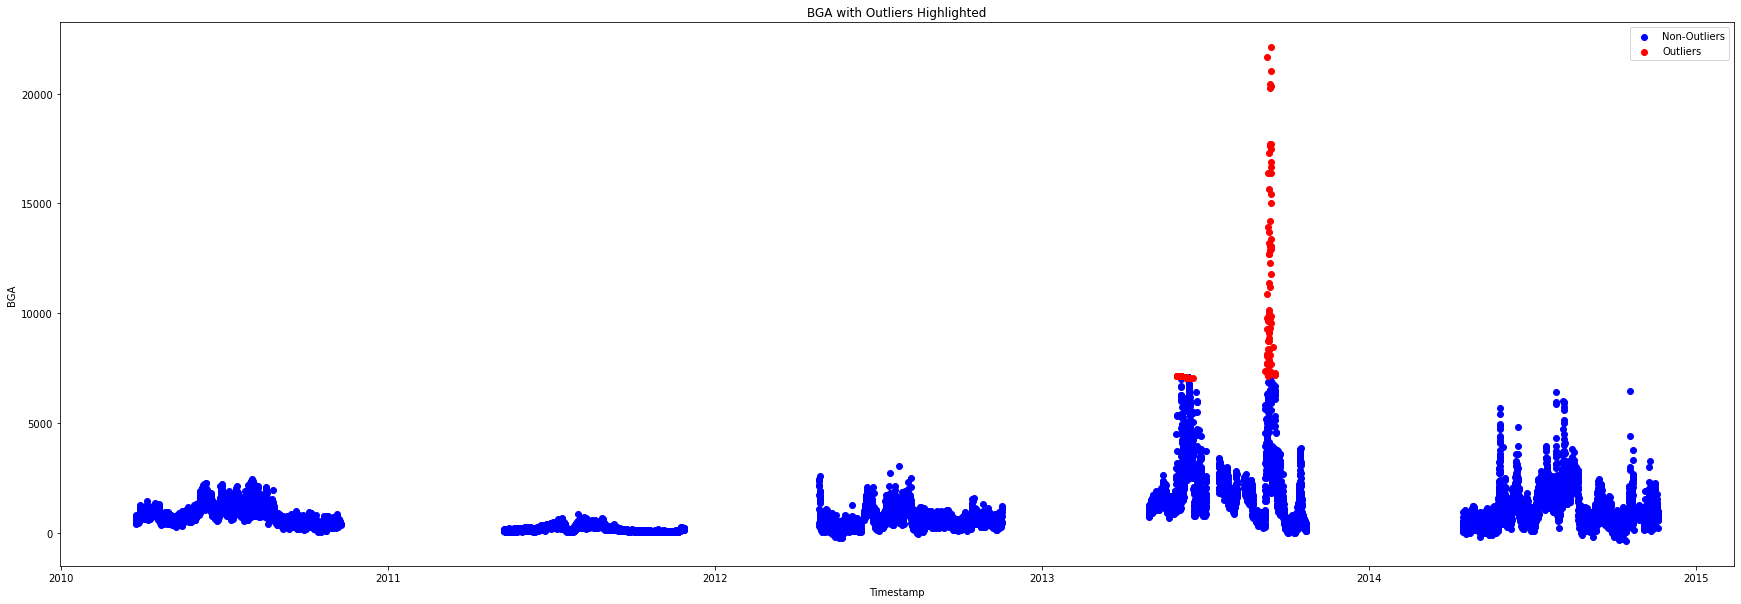

In [47]:
plot_with_outliers(df_outliers, "BGA")

## D) Handling Missing Values/Imputation

In [48]:
def set_outliers_to_null(df, features):
    """
    Set the values that were determined as outliers to null values.
    
    Parameters:
        - df: DataFrame
        - features: List of feature columns
        
    Returns:
        DataFrame with outlier values set to NaN
    """
    
    # Iterate through each feature
    for feature in features:
        # Create the outlier column name
        outlier_col = f"{feature}_outlier"
        
        # Set the values where the outlier column is True to NaN
        df.loc[df[outlier_col] == True, feature] = np.nan
    
    # You can optionally drop the outlier columns after setting outliers to NaN
    # df = df.drop(columns=[f"{feature}_outlier" for feature in features])
    
    return df


In [49]:
df_origin.head(2)

,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,...,DOmgL_outlier,DOsat_outlier,pH_outlier,Cond_outlier,AirTemp_outlier,Press_outlier,Turb_outlier,Chla-A_outlier,Phyco_outlier,BGA_outlier
Timestamp,,,,,,,,,,,,,,,,,,,,,
1991-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_nonoutliers = set_outliers_to_null(df_outliers, ['WaterTemp','DOmgL','DOsat','pH','Cond','AirTemp','Press','Turb','Chla-A','Phyco','BGA'])

In [51]:
def interpolate_single_column_with_max_gap(df, column_name, gap_limit_hours):
    gap_limit = pd.Timedelta(hours=gap_limit_hours)

    # convert index to numeric format (UNIX timestamp)
    numeric_index = df.index.astype(np.int64)

    # detect where the gaps are
    is_gap_after = df[column_name].isnull() & df[column_name].shift(-1).notnull()
    is_gap_before = df[column_name].isnull() & df[column_name].shift().notnull()

    # find out how long each gap is
    gap_after_hours = df[is_gap_after].index.to_series().diff().shift(-1)
    gap_before_hours = df[is_gap_before].index.to_series().diff()

    # interpolate only the gaps that are less than the limit
    is_small_gap_after = gap_after_hours < gap_limit
    is_small_gap_before = gap_before_hours < gap_limit

    # interpolate the data, but only during dry season
    df_interp = df.copy()
    is_dry_season = df_interp['DrySeason'] == True

    df_interp.loc[is_dry_season, column_name] = df[is_dry_season][column_name].where(
        ~is_gap_after | is_small_gap_after, 
        np.interp(numeric_index[is_dry_season], df[is_dry_season][column_name].dropna().index.values.astype(np.int64), df[is_dry_season][column_name].dropna().values))
    
    df_interp.loc[is_dry_season, column_name] = df_interp[is_dry_season][column_name].where(~is_gap_before | is_small_gap_before)

    return df_interp


In [52]:
df_WaterTemp = interpolate_single_column_with_max_gap(df_nonoutliers, 'WaterTemp', 4)
df_DO = interpolate_single_column_with_max_gap(df_WaterTemp, 'DOmgL', 4)
df_DOsat = interpolate_single_column_with_max_gap(df_DO, 'DOsat', 4)
df_pH = interpolate_single_column_with_max_gap(df_DOsat, 'pH', 6)
df_Cond = interpolate_single_column_with_max_gap(df_pH, 'Cond', 12)
df_AirTemp = interpolate_single_column_with_max_gap(df_Cond, 'AirTemp', 3)
df_Press = interpolate_single_column_with_max_gap(df_AirTemp, 'Press', 3)
df_Turb = interpolate_single_column_with_max_gap(df_Press, 'Turb', 12)
df_Chla = interpolate_single_column_with_max_gap(df_Turb, 'Chla-A', 4)
df_Phyco = interpolate_single_column_with_max_gap(df_Chla, 'Phyco', 4)
df_interp = interpolate_single_column_with_max_gap(df_Phyco, 'BGA', 4)

In [53]:
df_interp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280128 entries, 1991-05-07 01:00:00 to 2023-04-21 00:00:00
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   WaterTemp          273958 non-null  float64
 1   DOmgL              270968 non-null  float64
 2   DOsat              270766 non-null  float64
 3   pH                 272705 non-null  float64
 4   Cond               269944 non-null  float64
 5   AirTemp            252209 non-null  float64
 6   Press              207682 non-null  float64
 7   Turb               153796 non-null  float64
 8   Chla-A             101840 non-null  float64
 9   Phyco              20287 non-null   float64
 10  BGA                22981 non-null   float64
 11  DrySeason          280128 non-null  bool   
 12  WaterTemp_outlier  273823 non-null  object 
 13  DOmgL_outlier      270907 non-null  object 
 14  DOsat_outlier      270715 non-null  object 
 15  pH_outlier       

In [54]:
#compare to original number of non-missing values
df_nonoutliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280128 entries, 1991-05-07 01:00:00 to 2023-04-21 00:00:00
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   WaterTemp          273823 non-null  float64
 1   DOmgL              270808 non-null  float64
 2   DOsat              270593 non-null  float64
 3   pH                 272554 non-null  float64
 4   Cond               269751 non-null  float64
 5   AirTemp            252137 non-null  float64
 6   Press              207601 non-null  float64
 7   Turb               153492 non-null  float64
 8   Chla-A             101575 non-null  float64
 9   Phyco              20251 non-null   float64
 10  BGA                22884 non-null   float64
 11  DrySeason          280128 non-null  bool   
 12  WaterTemp_outlier  273823 non-null  object 
 13  DOmgL_outlier      270907 non-null  object 
 14  DOsat_outlier      270715 non-null  object 
 15  pH_outlier       

## E) Resample to daily with stats (Feature Creation)

In [55]:
# Drop columns whose names contain the word 'outlier'
columns_to_drop = [col for col in df_interp.columns if 'outlier' in col]
df_interp = df_interp.drop(columns=columns_to_drop) 

In [56]:
def custom_max(s):
    return s.max() if s.notna().all() else np.nan

def custom_min(s):
    return s.min() if s.notna().all() else np.nan

def custom_mean(s):
    return s.mean() if s.notna().all() else np.nan

def resample_with_daily_stats(df):
    # Resample to daily and check for null values in each group
    daily_max = df.resample('D').apply(lambda x: custom_max(x))
    daily_min = df.resample('D').apply(lambda x: custom_min(x))
    daily_mean = df.resample('D').apply(lambda x: custom_mean(x))

    # Rename columns of daily statistics dataframes
    daily_max.columns = [f'{col}_daily_max' for col in daily_max.columns]
    daily_min.columns = [f'{col}_daily_min' for col in daily_min.columns]
    daily_mean.columns = [f'{col}_daily_mean' for col in daily_mean.columns]

    # Dataframe with daily statistics
    df_final = pd.concat([daily_max, daily_min, daily_mean], axis=1)

    return df_final


In [57]:
df_dailystats = resample_with_daily_stats(df_interp)
df_dailystats

,WaterTemp_daily_max,DOmgL_daily_max,DOsat_daily_max,pH_daily_max,Cond_daily_max,AirTemp_daily_max,Press_daily_max,Turb_daily_max,Chla-A_daily_max,Phyco_daily_max,...,DOsat_daily_mean,pH_daily_mean,Cond_daily_mean,AirTemp_daily_mean,Press_daily_mean,Turb_daily_mean,Chla-A_daily_mean,Phyco_daily_mean,BGA_daily_mean,DrySeason_daily_mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
1991-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1991-05-08,13.6,8.0,77.0,7.2,166.0,NaN,NaN,NaN,NaN,NaN,...,75.541667,7.200,157.750000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1991-05-09,13.3,8.6,81.0,7.2,156.0,NaN,NaN,NaN,NaN,NaN,...,78.583333,7.200,150.458333,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1991-05-10,13.0,8.6,81.0,7.2,162.0,NaN,NaN,NaN,NaN,NaN,...,77.583333,7.200,153.125000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1991-05-11,12.3,8.8,81.0,7.2,166.0,NaN,NaN,NaN,NaN,NaN,...,78.541667,7.200,157.625000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,10.6,10.3,93.0,7.1,NaN,10.5,761.0,NaN,NaN,NaN,...,92.375000,7.100,NaN,6.529167,755.125000,NaN,NaN,NaN,NaN,1.0
2023-04-18,10.4,NaN,NaN,7.2,97.0,9.9,760.0,NaN,NaN,NaN,...,NaN,7.125,92.791667,5.745833,757.333333,NaN,NaN,NaN,NaN,1.0
2023-04-19,10.0,10.7,93.0,7.3,111.0,9.3,769.0,NaN,NaN,NaN,...,92.291667,7.150,91.541667,6.100000,763.500000,NaN,NaN,NaN,NaN,1.0


In [58]:
df_dailystats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11673 entries, 1991-05-07 to 2023-04-21
Freq: D
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WaterTemp_daily_max   11016 non-null  float64
 1   DOmgL_daily_max       10834 non-null  float64
 2   DOsat_daily_max       10806 non-null  float64
 3   pH_daily_max          10919 non-null  float64
 4   Cond_daily_max        10688 non-null  float64
 5   AirTemp_daily_max     10236 non-null  float64
 6   Press_daily_max       8419 non-null   float64
 7   Turb_daily_max        5464 non-null   float64
 8   Chla-A_daily_max      3750 non-null   float64
 9   Phyco_daily_max       767 non-null    float64
 10  BGA_daily_max         796 non-null    float64
 11  DrySeason_daily_max   11673 non-null  bool   
 12  WaterTemp_daily_min   11016 non-null  float64
 13  DOmgL_daily_min       10834 non-null  float64
 14  DOsat_daily_min       10806 non-null  float64

In [59]:
def plot_columns_starting_with(df, prefix, start_date, end_date):
    matching_columns = [col for col in df.columns if col.startswith(prefix) and 'outlier' not in col]
    df = df[(df.index >= start_date) & (df.index <= end_date)]

    plt.figure(figsize=(25, 6))
    for column in matching_columns:
        df[column].plot(label=column)
    
    plt.title(f"{prefix} related columns")
    plt.legend()
    plt.show()


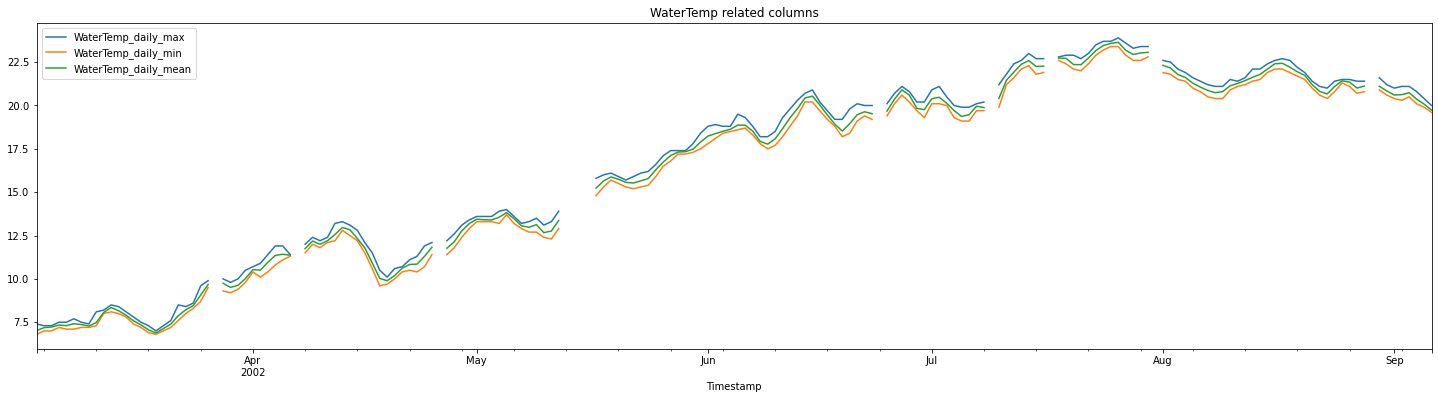

In [60]:
plot_columns_starting_with(df_dailystats, 'WaterTemp','2002-03-03', '2002-09-06')

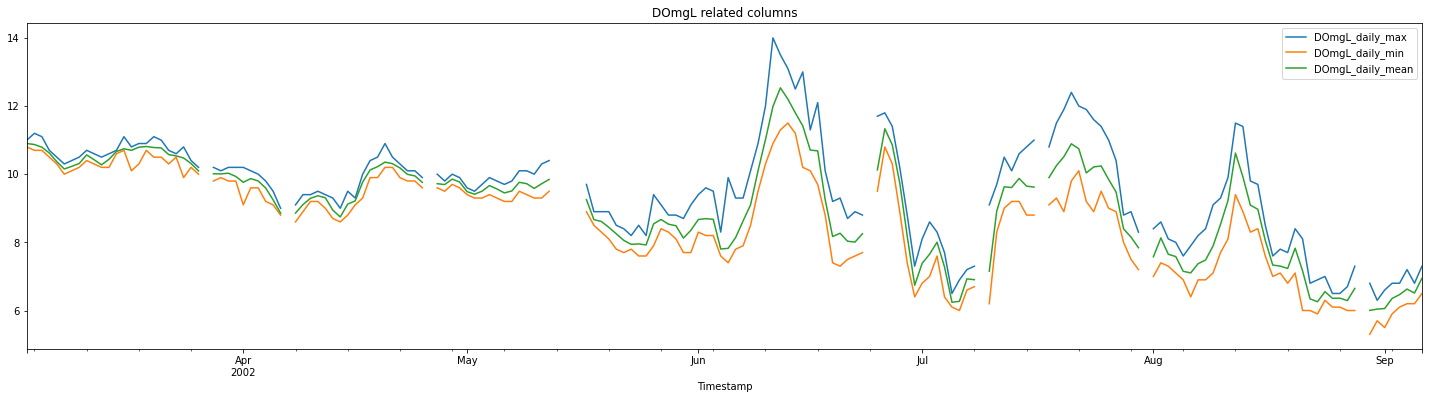

In [61]:
plot_columns_starting_with(df_dailystats, 'DOmgL','2002-03-03', '2002-09-06')

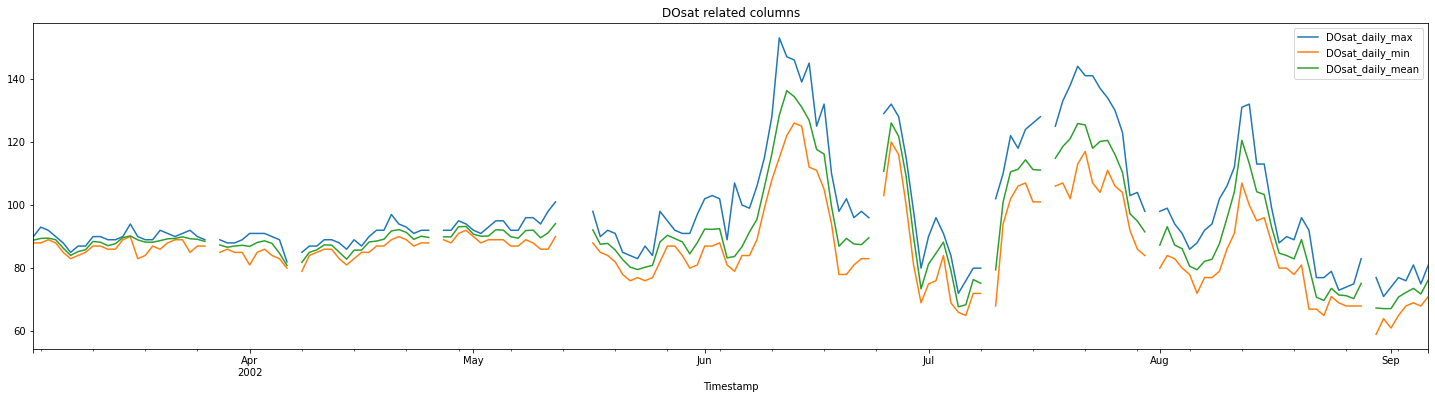

In [62]:
plot_columns_starting_with(df_dailystats, 'DOsat','2002-03-03', '2002-09-06')

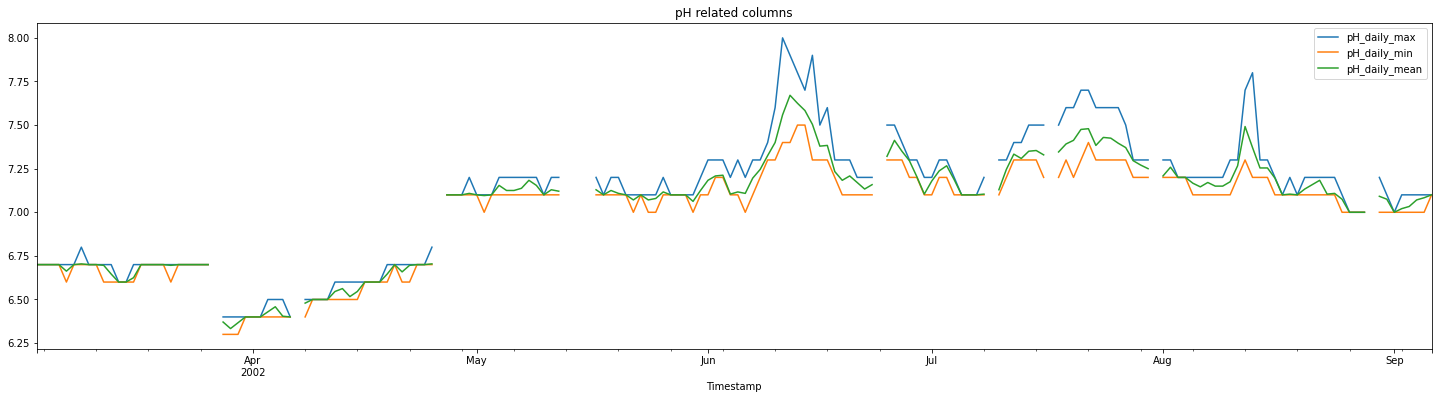

In [63]:
plot_columns_starting_with(df_dailystats, 'pH','2002-03-03', '2002-09-06')

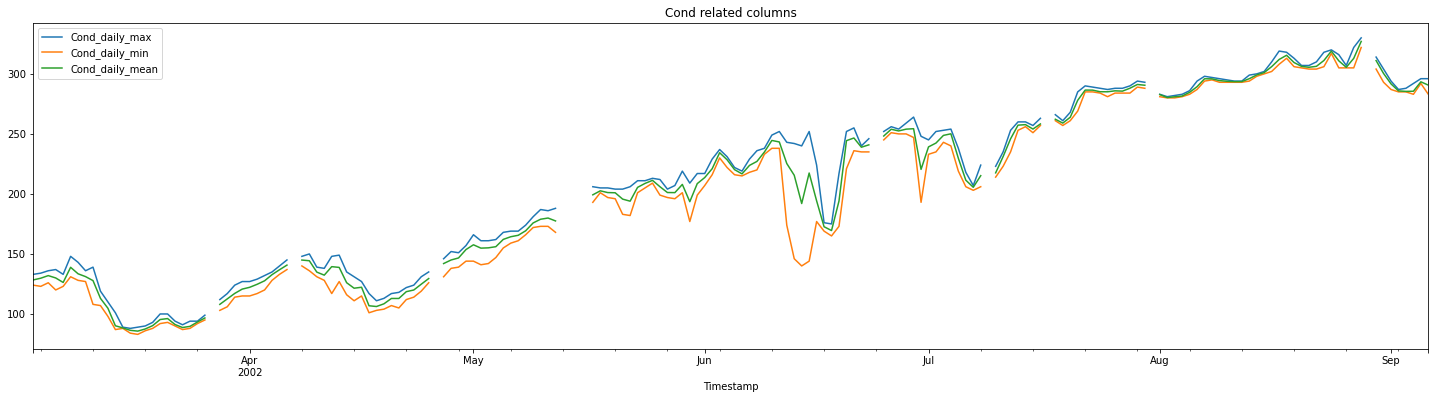

In [64]:
plot_columns_starting_with(df_dailystats, 'Cond','2002-03-03', '2002-09-06')

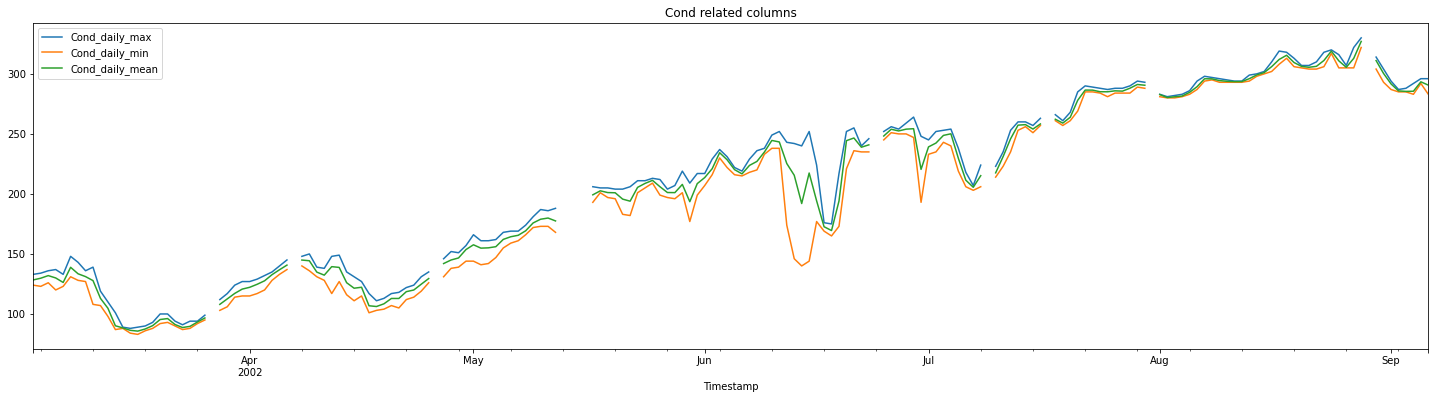

In [65]:
plot_columns_starting_with(df_dailystats, 'Cond','2002-03-03', '2002-09-06')

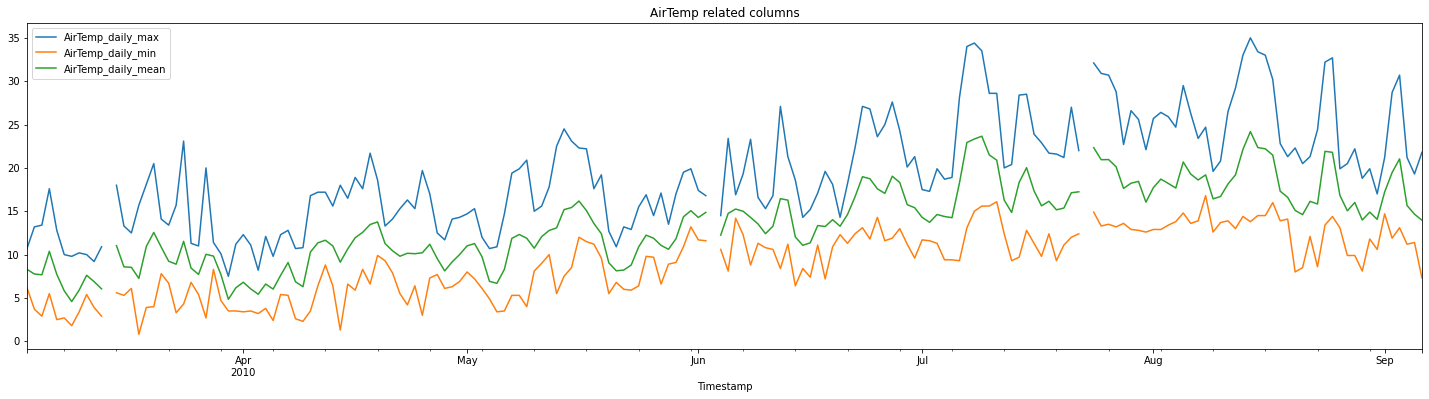

In [66]:
plot_columns_starting_with(df_dailystats, 'AirTemp','2010-03-03', '2010-09-06')

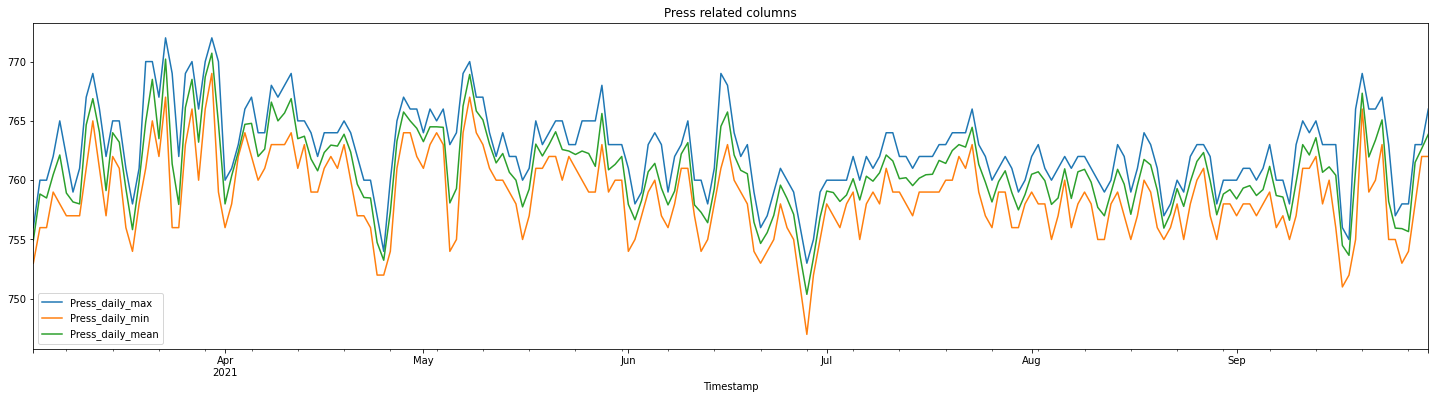

In [67]:
plot_columns_starting_with(df_dailystats, 'Press','2021-03-03', '2021-09-30')

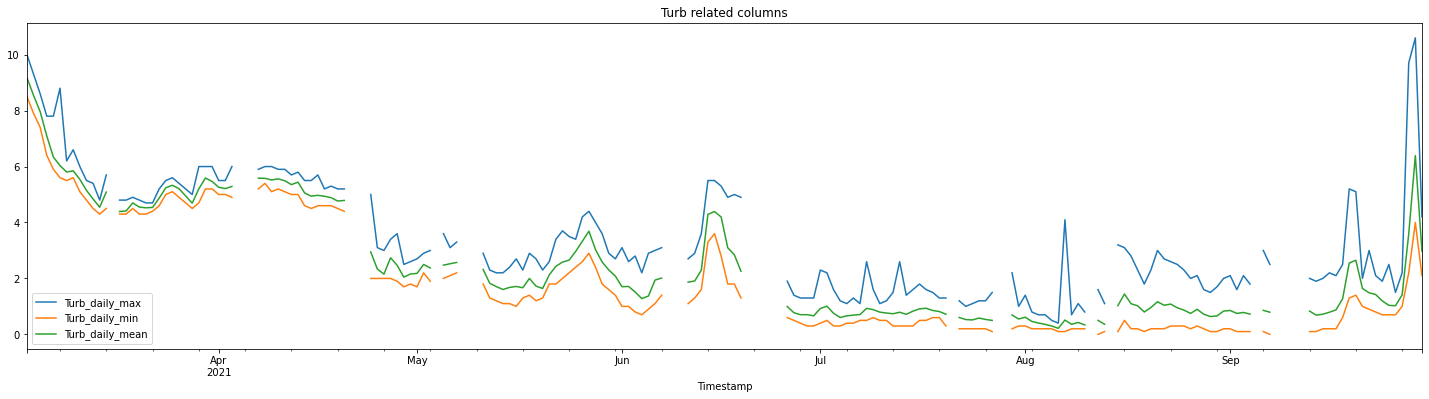

In [68]:
plot_columns_starting_with(df_dailystats, 'Turb','2021-03-03', '2021-09-30')

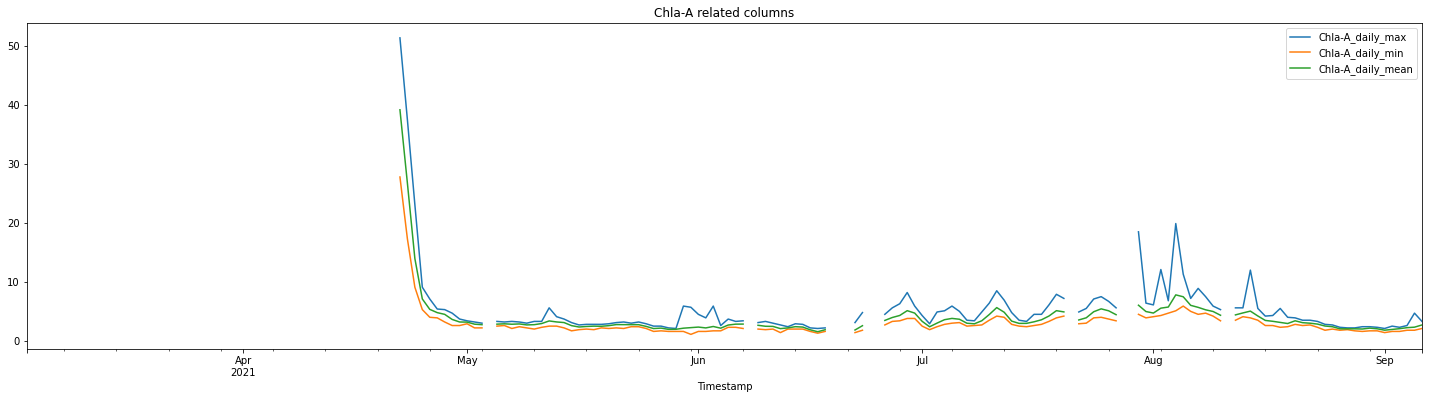

In [69]:
plot_columns_starting_with(df_dailystats, 'Chla-A','2021-03-03', '2021-09-06')

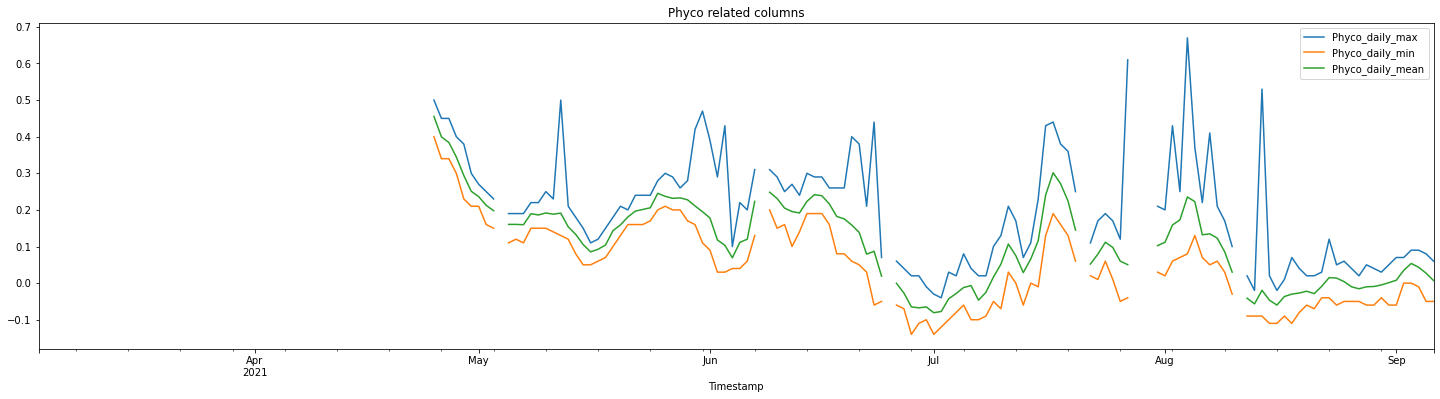

In [70]:
plot_columns_starting_with(df_dailystats, 'Phyco','2021-03-03', '2021-09-06')

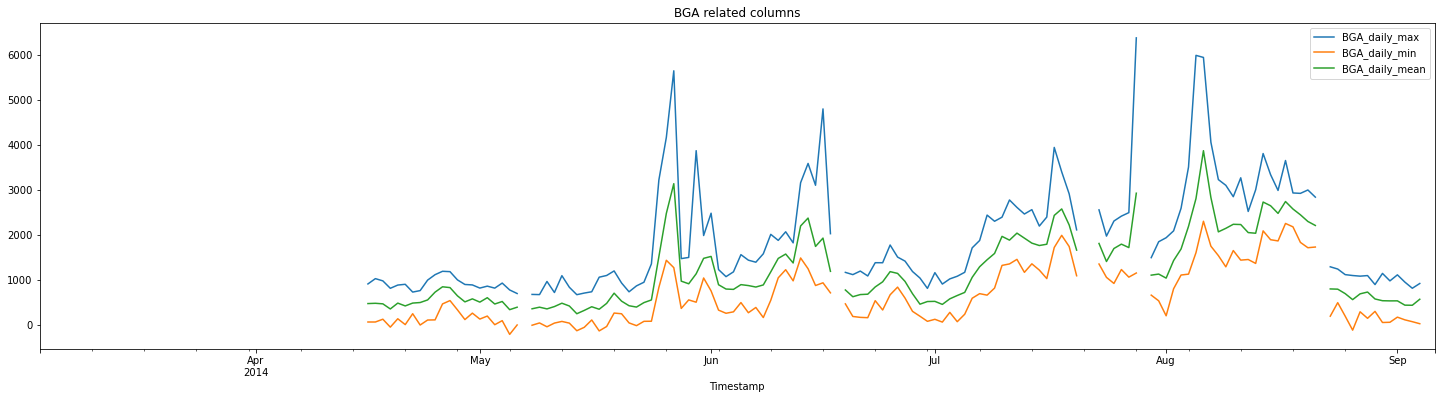

In [71]:
plot_columns_starting_with(df_dailystats, 'BGA','2014-03-03', '2014-09-06')

## F) Save File as CSV 

In [72]:
def save_dataframe_as_csv(df, location, file_path='.'):
    """
    Save a DataFrame to a CSV file.
    
    Parameters:
        - df: DataFrame to be saved.
        - location: The location string to include in the filename.
        - file_path: The directory to save the file in (optional).
        
    Returns:
        - None
    """
    
    # Extract start and end dates from the DataFrame's timestamp
    start_date = df.index.min().strftime('%Y-%m-%d')
    end_date = df.index.max().strftime('%Y-%m-%d')
    
    # Create the filename based on the location and the start and end dates
    filename = f'{location}_data_{start_date}_to_{end_date}.csv'
    
    # Join the file path and the filename
    full_path = os.path.join(file_path, filename)
    
    # Save the DataFrame to a CSV file
    df.to_csv(full_path)
    
    print(f'DataFrame saved as {full_path}')


In [73]:
save_dataframe_as_csv(df_dailystats, 'USGS_LakeOswego', file_path='.')

DataFrame saved as .\USGS_LakeOswego_data_1991-05-07_to_2023-04-21.csv


## Instant Data for Soft Sensor

In [74]:
save_dataframe_as_csv(df_interp, 'USGS_LakeOswego_hourly', file_path='.')
df_interp

DataFrame saved as .\USGS_LakeOswego_hourly_data_1991-05-07_to_2023-04-21.csv


,WaterTemp,DOmgL,DOsat,pH,Cond,AirTemp,Press,Turb,Chla-A,Phyco,BGA,DrySeason
Timestamp,,,,,,,,,,,,
1991-05-07 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1991-05-07 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1991-05-07 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1991-05-07 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1991-05-07 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2023-04-20 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2023-04-20 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


#### Dropping rows of data ** to be performed after time lag shift and correlation matrix

In [ ]:
#df_final.dropna()

In [129]:
# Check the number of non-missing values
#df_final.info()

In [91]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [93]:
from sklearn.model_selection import train_test_split

def split_data(df, target_column, test_size=0.2):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test
